<a href="https://colab.research.google.com/github/richards-okiemute/Swift-Meal-App-Data-Analysis-with-Python/blob/main/Swift_Meals_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Swift-Meal App Data Analysis
 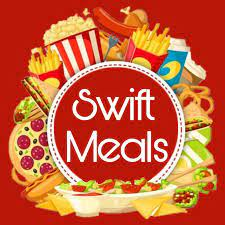
 
 *--- Richards Okiemute*

 * *richards.okiemute@gmail.com*


### Scenario

*  The number of food outlets in New York is experiencing a steady daily rising in number. A lot of professionals, workers, students depend on these food outlets to carter for their daily food requirements due to their tight schedules. Having access to an online food delivery app is a great solution to their challenges because it provides them wth the choice to make delivery from any food outlet of their choice with ease. An online food food aggregator start-up; **Swift-Meal**, proffers access to different food outlets through the use of a mobile app.

* With the mobile app, customers can make swift orders, link a delivery person to the order and guides the delivery person to the customer. The delivery person confirms the pick-up and drop-off of each order. The app also records the delivery time, preparation time and the customer service ratings. **Swift-Meal** generates revenue by collecting a fixed margin of the delivery order from various food outlets.

### Objective

The **Swift-Meal** has stored the data of the different orders made by the registered customers in her online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.

### Data Analyst Tasks

* Analyze the data to uncover useful insights from the data.

* Answer Business questions through analysis.

* Reach reasonable conclusions and proffer recommendations that will help improve the business.

### Data Information

The data contains the different data related to a food order. The various features are described below in the data columns.

### Data Columns

* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information
* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order

### Business Questions

1. Run a summary statistics on the dataset and give your observations
2. What is the number of unrated orders?
3. Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset
4. What are the top 5 restaurants that have received the highest number of orders?
5. What is the most popular cuisine on weekends?
6. What is the number of total orders where the cost is above 20 dollars? What is the percentage of such orders in the dataset?
7. What is the mean delivery time based on this dataset?
8. The company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details
9. Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset
10. The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer
11. The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset
12. The company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time
13. The company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends
14. Give your conclusions and business recommendations derived from the analysis

### Analysis

In [ ]:
# importing necessary libraries.

import numpy as np                     #for numerical computation
import pandas as pd                    #for data manipulation
import matplotlib.pyplot as plt        #for data visualization
import seaborn as sns                  #for data visualization
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.set_context('paper')
plt.rcParams["figure.figsize"] = (15, 8)
import warnings
warnings.filterwarnings("ignore")    #Ignore Warnings

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

#importing data from google drive
food = pd.read_csv('/content/drive/MyDrive/My Datasets/swift-meal data.csv')

#checking the first 10 rows of the data
food.head(10)

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


#### Comments

* The dataframe above shows the respective orders placed by various customers.
* The dataframe also shows the restuarant name, the cuisine type, the cost of the oder, the day of the week in which the order was place, the rating  the customer gave, the food preparation time and the delivery time.

#### Checking structure of the dataframe

In [ ]:
print('There are',food.shape[0], 'rows and', food.shape[1], 'columns in the dataframe')

There are 1898 rows and 9 columns in the dataframe


#### Information about the data types in the dataframe

In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Comments

* The dataframe contains no missing values.
* The various data types can seen on the **Dtype** column

In [ ]:
#checking for duplicates

food[food.duplicated()].count()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Comments

No duplicate was returned; there are no duplicates in the dataset

#### Checking for object variables

In [ ]:
object_variables = food.select_dtypes(exclude = ['float64','integer']).dtypes
object_variables

restaurant_name    object
cuisine_type       object
day_of_the_week    object
rating             object
dtype: object

As indicated above, the restaurant_name, cuisine_type, day_of_the_week, and rating are all objects.

These variables will be converted to categories.

In [ ]:
#converting objects into categories
food['restaurant_name'] = food['restaurant_name'].astype('category')
food['cuisine_type'] = food['cuisine_type'].astype('category')
food['day_of_the_week'] = food['day_of_the_week'].astype('category')
food['rating'] = food['rating'].astype('category')

In [ ]:
#Checking the info to confirm the conversion from objects to categories
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 90.9 KB


The objects have been converted to categories successfully

### Answering Business Questions

## **1. Run a summary statistics on the dataset and give your observations**

In [ ]:
food.describe() #descriptive statistics

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


> # **Observations**

* **Order_id:** There are 1898 orders in the datasets.

* **Customer_id:** There are also 1898 customers in the datasets.
* **Cost_of_the_order:** The average order costs about 16.5 dollars. The least order cost about 4.5 dollars while the most expensive order is 35.41 dollars.
75% of the orders cost below 22.3 dollars, about half of the orders also cost below 14.14 dollars while a quarter of the orders cost below 12 dollars. The spread (standard deviation) between the order costs is about 7.5 dollars.
    * Since, less than 75% of the customers orders below 22.3 dollars, it shows that the customers prefer low cost meals to expensive meal.

* **food_preparation_time:** The food preparation time ranges from 20 - 35.4mins, with an average preparation time of about 27.4mins.

* **delivery_time:** The food delivert time spns from 15 - 33minns, with an average time around 24mins. The spread of the delivery time is about 5mins.

# 2. **What is the number of unrated orders**

In [ ]:
print('The number of unrated orders is:',food[food['rating']=='Not given'].count()[0])

The number of unrated orders is: 736


There are a total of 736 unrated orders in the dataset

# **Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.**

# Cuisine Types

In [ ]:
print('Numbers of unique Cuisines:',food['cuisine_type'].nunique(),"\n")
[c for c in food['cuisine_type'].unique()]

Numbers of unique Cuisines: 14 



['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

There are 14 unique cuisines prepared by the different restaurants in the dataset. There lists of cuisines are given above.

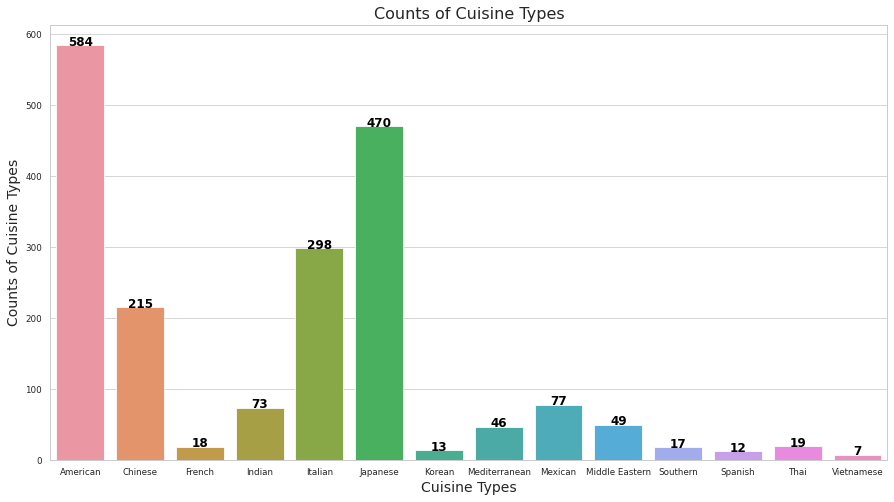

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(food['cuisine_type'])
plt.title('Counts of Cuisine Types', size = 16)
plt.xlabel('Cuisine Types', size = 14)
plt.ylabel('Counts of Cuisine Types', size = 14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='baseline', color='black', size=12, fontweight = "bold")
plt.show()

**From the visualization above:**
* American Cuisine is the most preferred type of cuisine type amongst the cuisines prepared by all the restaurants.
* Japanese Cuisine is the second most preferred cuisine type while  Italian cuisine comes third amongst the most preferred cuisines.
*Vietnamese is the least ordered cuisine. Thai, Spanish, Korean, Southern, and French are lists of lowest ordered cuisines in all the restaurants.

In [ ]:
print('Numbers of unique restaurants:',food['restaurant_name'].nunique(),"\n\nLists of first 20 restaurants")
[x for x in food['restaurant_name'][:20]]

Numbers of unique restaurants: 178 

Lists of first 20 restaurants


['Hangawi',
 'Blue Ribbon Sushi Izakaya',
 'Cafe Habana',
 'Blue Ribbon Fried Chicken',
 'Dirty Bird to Go',
 'Tamarind TriBeCa',
 'The Meatball Shop',
 'Barbounia',
 'Anjappar Chettinad',
 'Bukhara Grill',
 'Big Wong Restaurant \x8c_¤¾Ñ¼',
 'Empanada Mama (closed)',
 'Blue Ribbon Fried Chicken',
 'Pylos',
 "Lucky's Famous Burgers",
 'Shake Shack',
 'Sushi of Gari',
 'Blue Ribbon Sushi Izakaya',
 'RedFarm Hudson',
 'Blue Ribbon Sushi']

In [ ]:
print("Top 10 Restaurants with the highest orders\n")
food['restaurant_name'].value_counts()[:10]

Top 10 Restaurants with the highest orders



Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

Above we can see that Shake Shack has the highest order in the datasets followed by The Meatball Shop.

In [ ]:
print("Top 5 Restaurants with the lowest orders\n")
food['restaurant_name'].value_counts()[-5:]

Top 5 Restaurants with the lowest orders



Kambi Ramen House          1
Klong                      1
Kori Restaurant and Bar    1
Lamarca Pasta              1
'wichcraft                 1
Name: restaurant_name, dtype: int64

Above shows the least 5 popular restaurants in the dataset. They only have just one order each.

# Rating

In [ ]:
print('Numbers of unique ratings:',food['rating'].nunique(),"\n")
food['rating'].unique()

Numbers of unique ratings: 4 



['Not given', '5', '3', '4']
Categories (4, object): ['Not given', '5', '3', '4']

There are 4 unique ratings which are 'Not given', '5', '3', '4'

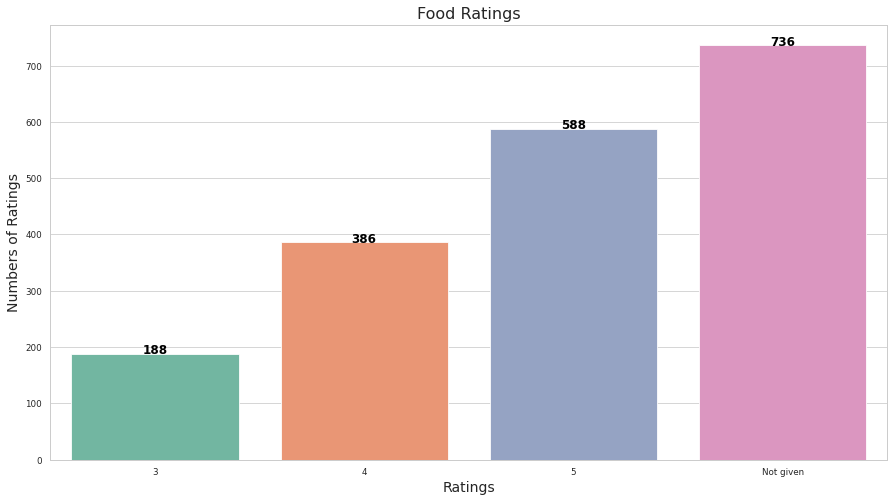

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=food['rating'])
plt.title('Food Ratings', size=16)
plt.xlabel("Ratings", size=14)
plt.ylabel("Numbers of Ratings", size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='baseline', color='black', size=12, fontweight = "bold")
plt.show()

* Most of the food ordered were not rated; **Not Given**
* 588 of the orders got a rating of 5.
* 386 of the orders got a rating of 4.
* 188 of the orders got a rating of 3, which is the least ratings in the dataset.

# day_of_the_week

In [ ]:
food['day_of_the_week'].unique()

['Weekend', 'Weekday']
Categories (2, object): ['Weekend', 'Weekday']

The day of the week contains two unique days namely; Weekend and Weekday.

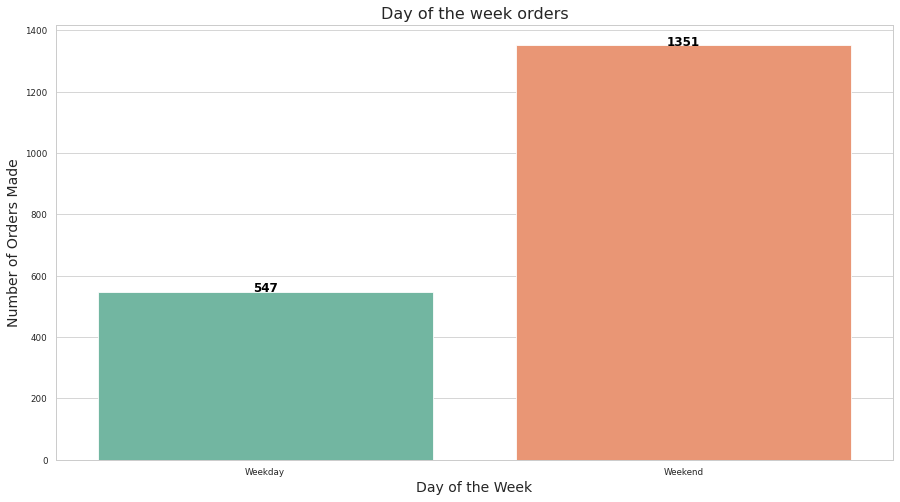

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.countplot(food['day_of_the_week'])
plt.title('Day of the week orders', size=16)
plt.xlabel("Day of the Week", size=14)
plt.ylabel("Number of Orders Made", size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='baseline', color='black', size=12, fontweight = "bold")
plt.show()

Most orders were made during weekends for all the restaurants. 

# cost_of_the_order

Text(0.5, 1.0, 'Cost of Order Distribution')

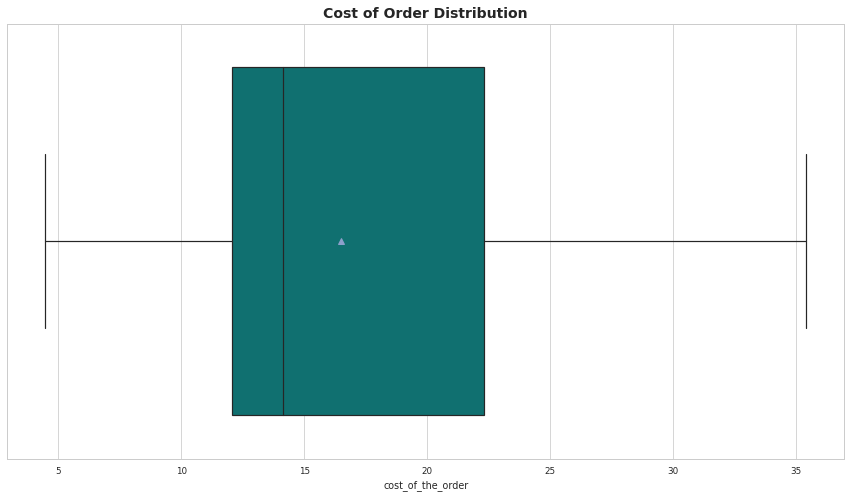

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(food['cost_of_the_order'], color='teal', showmeans = True)
plt.title("Cost of Order Distribution", size = 14, fontweight='bold')

In [ ]:
food['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

The boxplot above shows the distribution of the cost of order. The cost ranges from $4.47 to $35.4 per order.

Most of the orders are distributed around $12 - $22 per order.

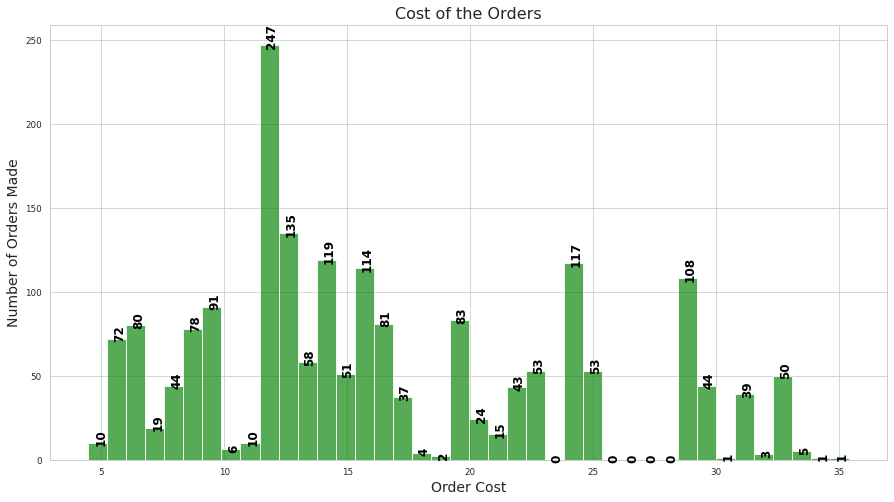

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.histplot(food['cost_of_the_order'], bins = 40, color = "g", alpha=.66)
plt.title('Cost of the Orders', size=16)
plt.xlabel("Order Cost", size=14)
plt.ylabel("Number of Orders Made", size=14)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='baseline', color='black', size=12, rotation=90, fontweight="bold")
plt.show()


* Majority of the cost of orders are centered around the 12-22 dollars.
* Only a few orders cost arounf 30-35 dollars.
* This also verifies the fact the customers prefer low cost food to very expensive foods.

In [ ]:
food['cost_of_the_order'].value_counts().head()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
Name: cost_of_the_order, dtype: int64

* Exploring the top 5 cost of orders shows that most of the orders lies with 12.18 - 24.20 dollars

* The cost of order with the most occurence is about 13 dollars and the cost of order 

In [ ]:
food.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

# food_preparation_time

Text(0.5, 1.0, 'Food Preparation Time Distribution')

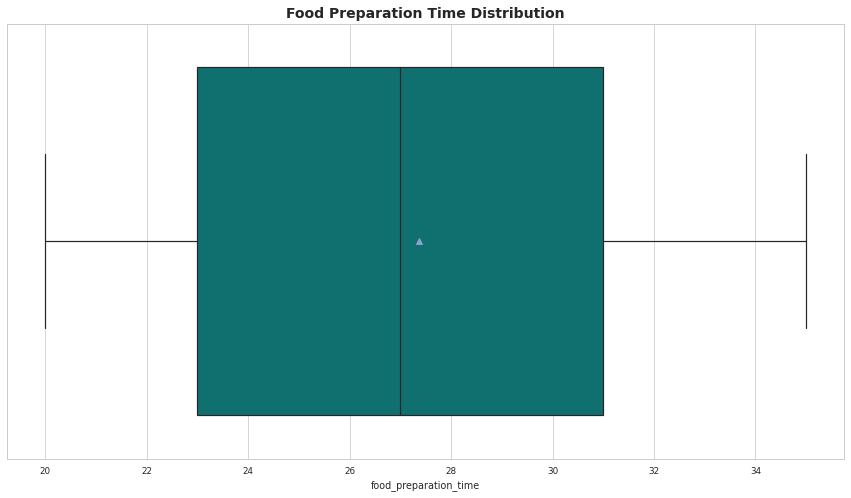

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(food['food_preparation_time'],showmeans = True, color='teal')
plt.title("Food Preparation Time Distribution", size = 14, fontweight='bold')


In [ ]:
food['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

* The average, median(50% quartile), maximum, and minimum food preparation time are shown above.
* There are no outliers in the dataset.
* 75% of the food were prepared below 31 mins and about half of the food were prepared below 27 mins. This gives an idea that more of the food were prepared around 20-27mins. 


# delivery_time

Text(0.5, 1.0, 'Delivery Time Distribution')

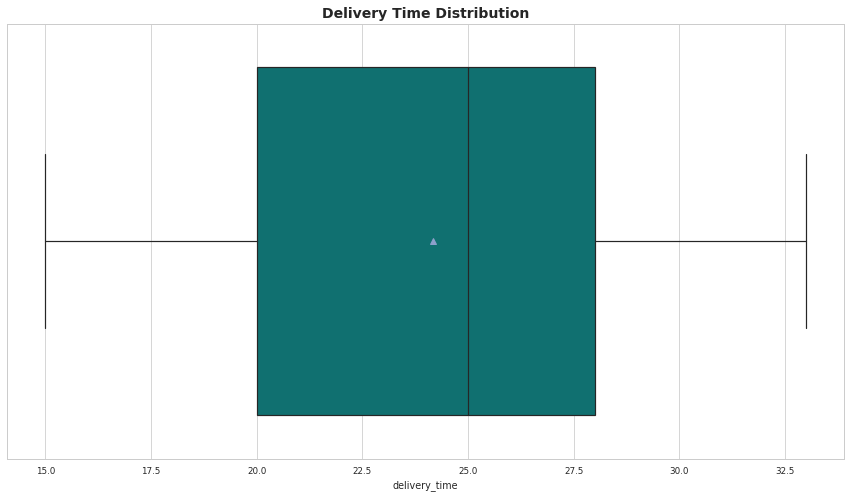

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(food['delivery_time'], showmeans = True, color='teal')
plt.title("Delivery Time Distribution", size = 14, fontweight='bold')

In [ ]:
food['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

The boxplot above shows the distribution of the delivery time.
The average distribution time for each order across all restaurants in the dataset is about 24.2 mins.

The least delivery time was 15 mins while the maximum delivery time was 33 mins.

About 75% of the orders were delivered below 28 mins.

# What are the top 5 restaurants that have received the highest number of orders?

In [ ]:
print("Top 5 Restaurants with the highest orders\n")
food['restaurant_name'].value_counts()[:5]

Top 5 Restaurants with the highest orders



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

`Shack Shack` restaurant is the restaurant with the most orders followed by The `Meatball Shop`

# **Which Cuisine is the most popular cuisine on weekends?**

In [ ]:
food[food['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Spanish            11
Southern           11
Korean             11
Vietnamese          4
Name: cuisine_type, dtype: int64

* The most popular cuisine on weekends are;
 * 1. American cuisine: Ordered 415 times.
 *  2. Japanese cuisine: Ordered 335 times.
 *  3. Chinese cuisine: Ordered 163 times.

* The least popular cuisine during the weekend is:
 * 1. Vietnamese cuisine: Ordered only 4 times.

# **Find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?**

In [ ]:
orders_abv_20 = food[food['cost_of_the_order'] > 20]
len(orders_abv_20)

555

There a total of 555 orders in the dataset with cost above 20 dollars

In [ ]:
percentage_order = round((len(orders_abv_20)/len(food))*100,2)
print('The percentage of orders above $20 in the dataset is: ',percentage_order,'%')

The percentage of orders above $20 in the dataset is:  29.24 %


# **What is the mean delivery time based on this dataset?**

In [ ]:
round(food["delivery_time"].mean(),2)

24.16

The average delivery time of orders by the various restaurants is 24.16 mins.

# **The company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. What is the ID of the customer along with the order details?**

In [ ]:
max_order_amnt = food['cost_of_the_order'].max()
my_customer = food[food['cost_of_the_order']==max_order_amnt]
my_customer

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


**Winner of the 15 dollar coupon**

The Customer with customer id: 62359 with order id: 1477814 bought a Mediterranean cuisine from Pylos restaurant on a weekday at a cost of $35.41.

Further details are shown in the Customer's dataframe above.

# **Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset**

<Figure size 1080x576 with 0 Axes>

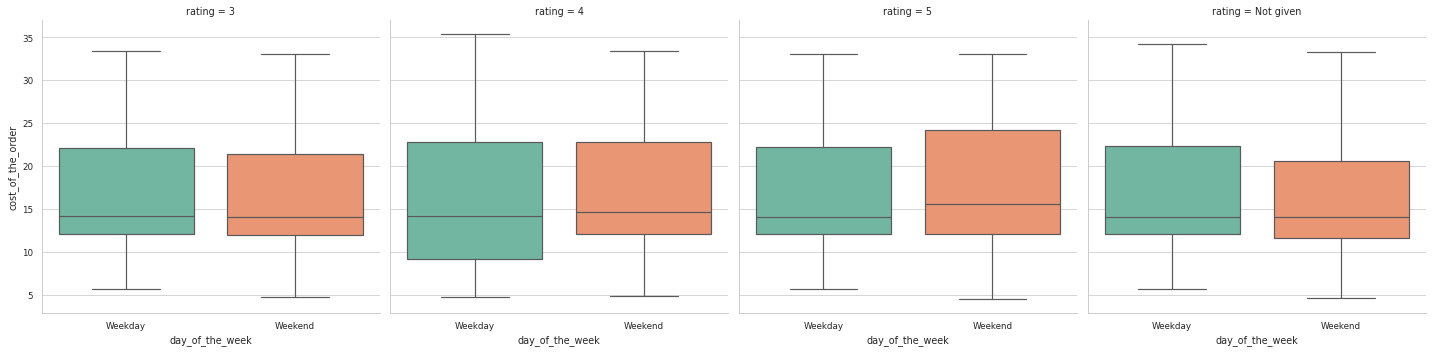

In [ ]:
#multivariate analysis between cost of order, day of the week, and rating
sns.catplot(
    data=food, x='day_of_the_week', y='cost_of_the_order',
    col='rating', kind='box', col_wrap=4
)

The average ratings for the orders made during the weekends and weekdays have similar cost.

Perhaps cost is not a main factor for giving ratings.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

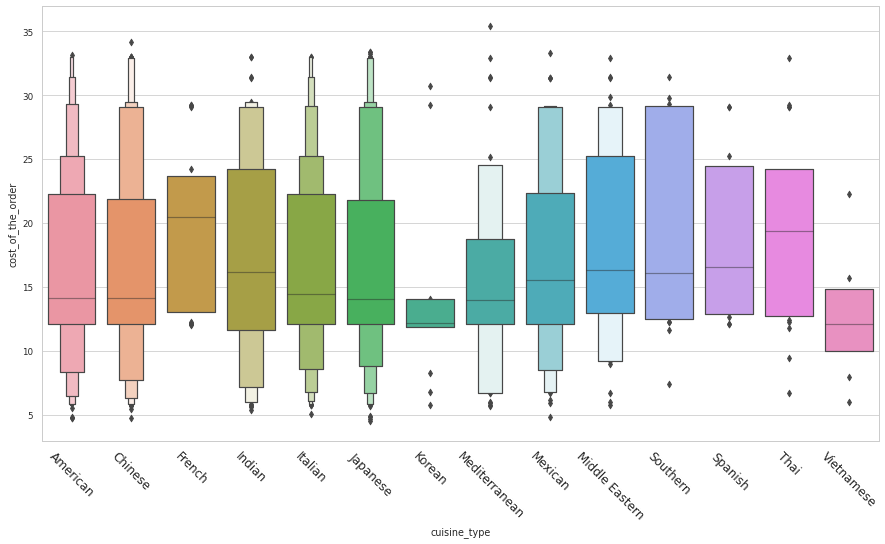

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15,8))
sns.boxenplot(x = 'cuisine_type', y = 'cost_of_the_order', data = food)
plt.xticks(size=12,rotation=-45)

The boxenplot above shows that there are outliers exisiting in the type cost of different cuisines ordered by different customers from various restaurants.

Suprisingly, French cuisines, have the highest average cost of orders.
Vietnamese has the lowest average cost of orders.

The popular cuisines (American, Japanese, Chineses, and Italian) has thinner tails at higher costs; only a few customers made expensive orders of these meals.

Text(0.5, 1.0, 'Day of the Week vs Delivery Time')

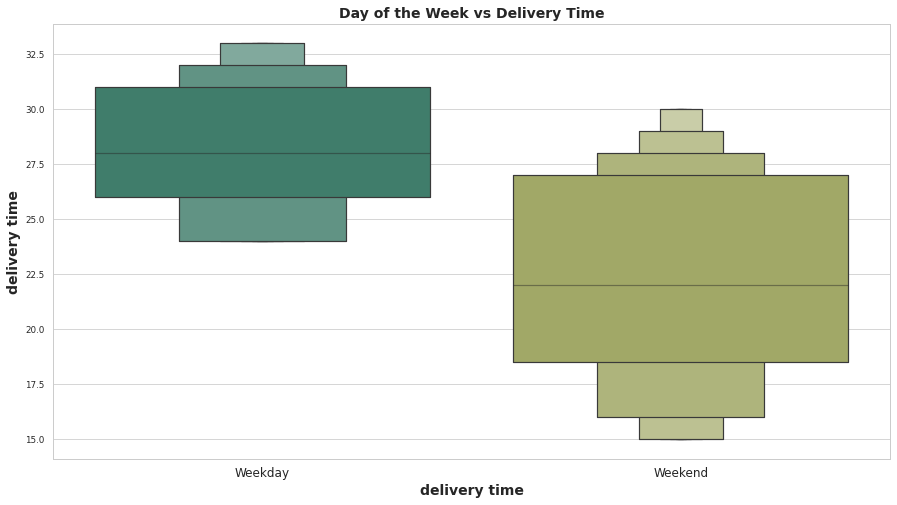

In [ ]:
plt.figure(figsize=(15,8))
sns.boxenplot(x = "day_of_the_week", y = "delivery_time", data = food, palette = 'gist_earth')
plt.xticks(size=12)
plt.ylabel("delivery time", size=14, fontweight="bold")
plt.xlabel("delivery time", size=14, fontweight="bold")
plt.title("Day of the Week vs Delivery Time", size = 14, fontweight='bold')

Weekends orders are delivered quicker than orders maded during weekdays.

The average Weekend order delivery time is around 22mins compared to about 28 mins for Weekday orders delivery time.

Text(0.5, 1.0, 'Delivery Time vs Rating Trend')

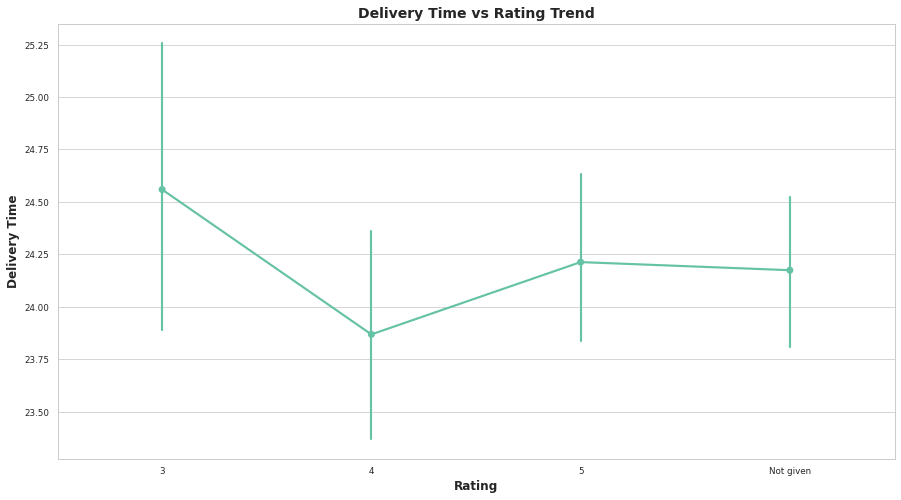

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15,8))
sns.pointplot(x = 'rating', y = 'delivery_time', data = food, c="teal")
plt.ylabel("Delivery Time", fontweight = 'bold', size=12)
plt.xlabel("Rating", fontweight = 'bold', size=12)
plt.title("Delivery Time vs Rating Trend", size = 14, fontweight='bold')

Lower delivery time (fast deliveries) seem to get higher ratings

Text(0.5, 1.0, 'Rating vs Food Preparation Time')

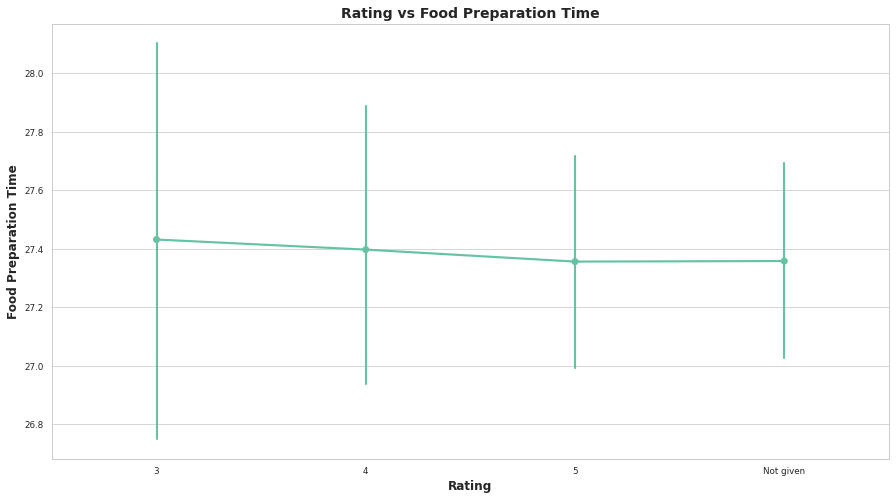

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15,8))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = food, c='teal')
plt.ylabel("Food Preparation Time", fontweight = 'bold', size=12)
plt.xlabel("Rating", fontweight = 'bold', size=12)
plt.title("Rating vs Food Preparation Time", size = 14, fontweight='bold')

Food preparation time does not really affect the ratings of the orders.

Text(0.5, 1.0, 'Rating vs Cost of the Order')

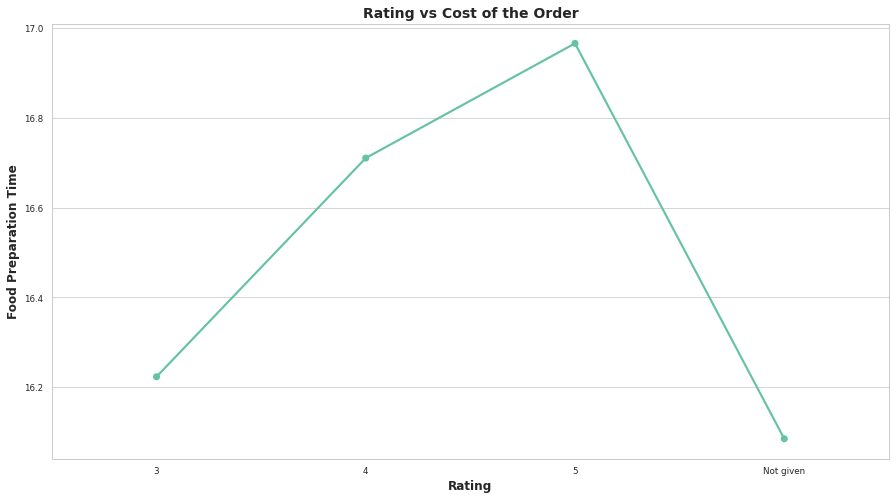

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15,8))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = food, c='teal', ci = None)
plt.ylabel("Food Preparation Time", fontweight = 'bold', size=12)
plt.xlabel("Rating", fontweight = 'bold', size=12)
plt.title("Rating vs Cost of the Order", size = 14, fontweight='bold')

Orders with higher costs are rated well off than orders with lower costs.

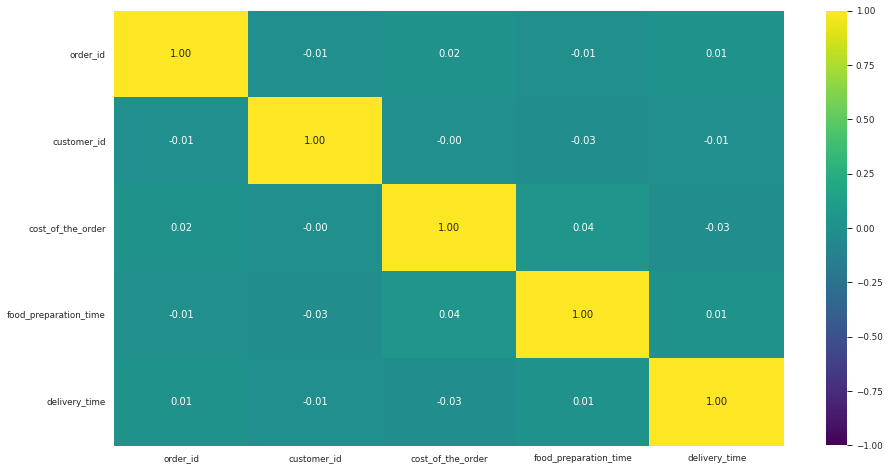

In [ ]:
#Correlation among variables
plt.figure(figsize=(15,8))
sns.heatmap(food.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis")

There are no strong correlation between the variables in the dataset.

## **The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Which restaurants fulfills the criteria to get the promotional offer?**

In [ ]:
# filter the rated restaurants
food_rated = food[food['rating'] != 'Not given'].copy()

# convert rating column from object to integer
food_rated['rating'] = food_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
food_rating_count = food_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
# get the restaurant names that have rating count more than 50
rest50 = food_rating_count[food_rating_count['rating'] > 50]
rest50

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


The table above shows the restaurants with ratings above 50.

These are the top four (4) restaurants with the highest number of orders.

In [ ]:
# get the restaurant names that have rating count more than 50
rest50 = food_rating_count[food_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
avg_rating4 = food_rated[food_rated['restaurant_name'].isin(rest50)].copy()
# find the mean rating of the restaurants
avg_rating4.groupby(avg_rating4['restaurant_name'].cat.remove_unused_categories())['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


Suprisingly, `The Meatball Shop` restaurant has the highest average ratinng alongside `Blue Ribbon Fried Chicken`.

`Shake Shack` and `Blue Ribbon Sushi` stand at the third and fourth respectively with average ratings of 4.23 and 4.22 respectively.

Therefore, the restaurants fulfilling the criteria to get the promotional offer are: 
   *  1. `The Meatball Shop`, 
   *  2. `Blue Ribbon Fried Chicken`, 
   *  3. `Shake Shack` and 
   *  4. `Blue Ribbon Sushi`.

# **The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. What is the net revenue generated on all the orders given in the dataset?**

In [ ]:
# calculating the revenue generated from the charges on orders delivered.
food['Charges'] = [cost*0.25 if cost > 20
                   else cost*0.15 if cost > 5
                   else 0 for cost in food['cost_of_the_order']]
food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Charges
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


The table above shows the charges per order made.

In [ ]:
#computing the total revenue derived from the charges by Swift-Meals
print('The total revenue generated from the charges on orders is',food['Charges'].sum(),'dollars')

The total revenue generated from the charges on orders is 6166.303 dollars


The total revenue generated from the charges on orders is 6166.303 dollars

# **The company wants to analyze the total time required to deliver the food. What is the percentage of orders that have more than 60 minutes of total delivery time?**

In [ ]:
food['total_delivery_time'] = food['delivery_time'] + food['food_preparation_time']
time_greater_than_60 = food[food['total_delivery_time']>60]
percentage_total_delivery = len(time_greater_than_60)/(len(food))*100
round(percentage_total_delivery,2)

10.54

Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.

# **The company wants to analyze the delivery time of the orders on weekdays and weekends. What is the mean delivery time on weekdays and weekends.**

In [ ]:
weekend_average_delivery_time = food[food['day_of_the_week']=='Weekend']['delivery_time'].mean()
weekday_average_delivery_time = food[food['day_of_the_week']=='Weekday']['delivery_time'].mean()
print('weekday average delivery_time: ',round(weekday_average_delivery_time),'mins','\nweekend average delivery_time: ',round(weekend_average_delivery_time),"mins")

weekday average delivery_time:  28 mins 
weekend average delivery_time:  22 mins


The average delivery time during the weekdays is 28 mins while the average delivery time during the weekend is 22 mins.

# **Conclusion and Recommendations**

# **Conclusions:**

* A very large percentage (about 83%) of the orders are American, Japenese, Italian, and Chinese cuisines. These are the most preferred cuisines by the customers.

* There are more orders during the weekends than weekdays. About 71% of the orders made were made during the weekends.

* The top four (4) restaurants with the highest orders are also the restaurants with the highest ratings.

  * top four (4) restaurants: `Shake Shack`, `The Meatball Shop`,
`Blue Ribbon Fried Chicken`,and `Blue Ribbon Sushi`.

* Shake Shack is the most popular restaurant that has received the highest number of orders.

* Weekends orders are delivered quickly than orders maded during weekdays. These could be due to many reasons: Traffic, customers preference (preferring to eat out during weekends), weekend events, etc.

* Most of the cost of orders lies around 12 - 22 dollars

# **Business Recommendations**

* From the data analysis, a larger percentage of the customer prefers American cuisines, Italian cuisines, Japanese Cuisines, and Chinese Cuisines. Therefore, Swift-Meal should build a business model around the restaurants with these cuisines.

* Encouraging other lower order demand restaurants to implement these meals into their menu would increase their orders as well.

* Since about 71% of the orders were made during Weekends, Swift-Meal should plan to increase the numbers of Delivery personnel available during Weekends.

* More than 10% of the orders have delivery time more than 1 hour. This could cause more dissatisfaction among customers as the delivery time is too long. Swift-Meal should try to reduce the food delivery time.

* The Swift-Meal app should be designed to collect more data in order to carry out Customer Segmentation and Profiling Analysis to  further understand the customers buying behavior and their locations. These will enable the customers to be grouped into different classes base on income, food preference, and more importantly location. The result of this analysis will further help in positioning restaurants in strategic locations in order to reduce delivery time and improve customers rating/satisfaction.

* Swift-Meal should carry out more promotional offers in the restaurants with the highest orders and ratings.

* Price also plays an important roles in the number of orders made. Restaurants should try reducing the price of some cuisines in order to increase the amount of orders received.

